# 1. Code

## Regular Merge Sort

In [1]:
import numpy as np

global STEP
STEP = 0

def test(sort_algorithm):
    correctness = True
    
    lengths = np.random.randint(0,1000,20)
    for length in range(10)+list(lengths):
        l = np.random.randint(-1000,1000,length).astype(float) #for compatibility with float('inf')
        l_standard = np.sort(l)
        sort_algorithm(l, 0, len(l)) # sort in place
        if not np.array_equal(l, l_standard):
            correctness = False
    if correctness:
        print "Algorithm passed the test"
    else:
        print "Algorithm failed the test"

def merge(A, p, q, r):
    global STEP
    n1 = q - p
    n2 = r - q
    L = np.empty(n1+1)
    R = np.empty(n2+1)
    L[:n1] = A[p:p+n1]
    R[:n2] = A[q:q+n2]
    L[n1] = float('inf')
    R[n2] = float('inf')
    i = 0
    j = 0
    for k in range(p, r):
        STEP += 1
        if L[i] <= R[j]:
            A[k] = L[i]
            i = i + 1
        else:
            A[k] = R[j]
            j = j + 1
            
def merge_sort(A, p, r):
    if p < r-1:
        q = (p + r) / 2
        merge_sort(A, p, q)
        merge_sort(A, q, r)
        merge(A, p, q, r)

test(merge_sort)

Algorithm passed the test


## Three-way Merge Sort

In [2]:
def merge_3way(A, p, q1, q2, r):
    global STEP
    n1 = q1 - p
    n2 = q2 - q1
    n3 = r - q2
    L = np.empty(n1+1)
    M = np.empty(n2+1)
    R = np.empty(n3+1)
    L[:n1] = A[p:p+n1]
    M[:n2] = A[q1:q1+n2]
    R[:n3] = A[q2:q2+n3]
    L[n1] = float('inf')
    M[n2] = float('inf')
    R[n3] = float('inf')
    i = 0
    j = 0
    l = 0
    for k in range(p, r):
        STEP += 2
        if L[i] < R[j]:
            if M[l] < L[i]:
                A[k] = M[l]
                l = l + 1
            else:
                A[k] = L[i]
                i = i + 1
        else:
            if M[l] < R[j]:
                A[k] = M[l]
                l = l + 1
            else:
                A[k] = R[j]
                j = j + 1
            
def merge_sort_3way(A, p, r):
    if p < r-1:
        q1 = p + (r-p) / 3
        q2 = p + (r-p) * 2 / 3
        merge_sort_3way(A, p, q1)
        merge_sort_3way(A, q1, q2)
        merge_sort_3way(A, q2, r)
        merge_3way(A, p, q1, q2, r)
    
test(merge_sort_3way)

Algorithm passed the test


## Augmented Three-way Merge Sort

In [3]:
def insertion_sort(A, p, r):
    global STEP
    
    for j in range(p, r):
        key = A[j]
        i = j - 1
        while (i > p-1) and (A[i]>key):
            A[i+1] = A[i]
            i = i -1
            STEP += 1
        A[i+1] = key

test(insertion_sort)
       
def merge_sort_3way_aug(A, p, r, limit):
    if p < r-limit:
        q1 = p + (r-p) / 3
        q2 = p + (r-p) * 2 / 3
        merge_sort_3way_aug(A, p, q1, limit)
        merge_sort_3way_aug(A, q1, q2, limit)
        merge_sort_3way_aug(A, q2, r, limit)
        merge_3way(A, p, q1, q2, r)
    else:
        insertion_sort(A, p, r)

def aug_20(A, p, r):
    merge_sort_3way_aug(A, p, r, 20)
    
test(aug_20)


Algorithm passed the test
Algorithm passed the test


## K-way Merge Sort

In [4]:
def merge_kway(A, q):
    global STEP
    p = q[0]
    r = q[-1]
    q_end = q.copy()[1:]
    q = q[:-1]
    new_list = np.empty(r - p)
    
    for k in range(r-p):
        first_elements = A[q]
        new_list[k] = np.min(first_elements)
        STEP += len(first_elements)-1 #I used min to simplify the code, but the actual computational step should be k-1
        arg = np.argmin(first_elements)
        q[arg] += 1
        if q[arg] >= q_end[arg]:
            q[arg] -= 1
            A[q[arg]] = float('inf')
                   
    A[p:r] = new_list

            
def merge_sort_kway(A, p, r, k):
    if p < r-1:
        q = np.empty(k+1).astype(int)
        q[0] = p
        for i in range(1,k+1):
            q[i] = p + (r-p) * i / k
            merge_sort_kway(A, q[i-1], q[i], k)
        merge_kway(A, q)

def kway_5(A, p, r):
    merge_sort_kway(A, p, r, 5)

def kway_10(A, p, r):
    merge_sort_kway(A, p, r, 10)

test(kway_5)
test(kway_10)


Algorithm passed the test
Algorithm passed the test


# 2. Performance Measure

## 2.1 Preliminary Test

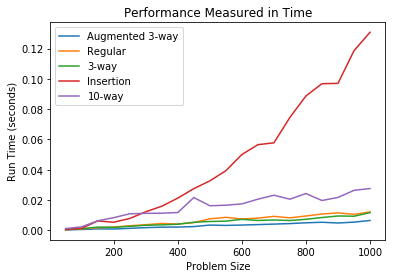

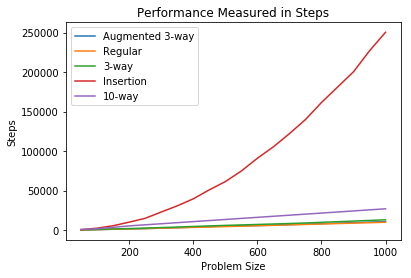

In [5]:
%matplotlib inline
import time
import matplotlib.pyplot as plt
def measure_performance(algorithms, trials=10, max_size=1000, interval=50):
    
    global STEP
    np.random.seed(123)
    problem_sizes = range(interval,max_size+interval,interval)
    performance = {_:[] for _ in algorithms}
    performance_step = {_:[] for _ in algorithms}
    
    
    for n in problem_sizes:
        # generate a number of problems for each size
        problems = [np.random.randint(-1000,1000,n).astype(float)
                   for _ in range(trials)] #for compatibility with float('inf')
        for name, each_algorithm in algorithms.items():
            time_sum = 0
            STEP = 0
            for each_problem in problems:
                p_copy = np.copy(each_problem)
                start_time = time.time()
                each_algorithm(p_copy, 0, len(p_copy)) # sort in place
                time_sum += time.time() - start_time
            
            performance[name].append(time_sum/float(trials))
            performance_step[name].append(STEP/float(trials))
    
    # First plot
    plt.figure()
    for name, data in performance.items():
        plt.plot(problem_sizes, data, label=name)
    plt.xlabel("Problem Size")
    plt.ylabel("Run Time (seconds)")
    plt.title("Performance Measured in Time")
    plt.legend()
    
    #Second plot
    plt.figure()
    for name, data in performance_step.items():
        plt.plot(problem_sizes, data, label=name)
    plt.xlabel("Problem Size")
    plt.ylabel("Steps")
    plt.title("Performance Measured in Steps")

    plt.legend()
    
    return performance, performance_step
    
algorithms = {
    "Regular":merge_sort,
    "3-way": merge_sort_3way,
    "Augmented 3-way": aug_20,
    "10-way": kway_10,
    "Insertion": insertion_sort,
}

t1, s1 = measure_performance(algorithms)

In the two plots above, I plot the **run time** and **step** respectively against **problem size** ({50, 100, 150,...1000}) for five different sorting algorithms: 
* regular merge sort, 
* 3-way merge sort, 
* augmented 3-way merge sort (calling insertion sort when lengths of sublists are below 20), 
* k-way merge sort(k=10), and 
* insertion sort as a baseline for comparison.

Each data point is the average of 10 trials with different problems of the same size. Each problem is generated randomly, consisting of integers from -1000 to 1000. Each comparison in algorithms is counted as one step. Detailed data is attached at the bottom$^1$.

From these results we can see that:
1. Time plot and step plot do not differ too much, meaning that the implementations of the algorithms are reasonable and clock time efficiency can be used in predicting theoretical complexity.
2. Unsurprisingly insertion sort performs the worst among all. This reflects its worst case complexity at O(n^2)
3. 10-way merge sort seems to be the second inefficient algorithm and augmented 3-way is doing well in time measure.

Further, I would like to explore these questions:
1. How does changing the k affects the performance of k-way merge sort?
2. How does changing the threshold for augmented 3-way merge sort affect performance?
3. What is the most efficient algorithm we can find after tuning these parameters?$^2$

--------------
Footnotes

$^{[1]}$ #Composition: I tried to explain how the test works in the most concise and precise way.

$^{[2]}$ #Presentation: I explicitly divided my discussion into observations and new questions, and presented them with numbered points which makes it very clear.

## 2.2 Exploring K-way Merge Sort

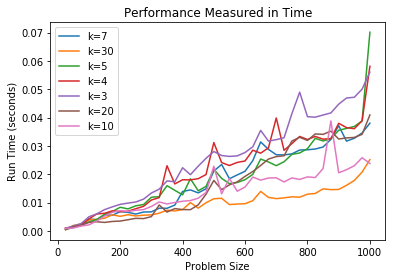

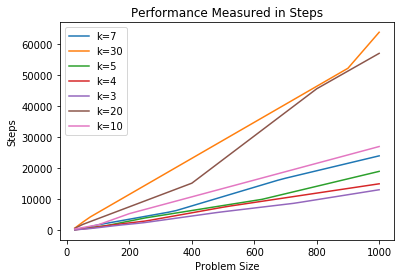

In [6]:
algorithms = {
    "k=3":lambda A, p, r: merge_sort_kway(A, p, r, 3),
    "k=4":lambda A, p, r: merge_sort_kway(A, p, r, 4),
    "k=5":lambda A, p, r: merge_sort_kway(A, p, r, 5),
    "k=7":lambda A, p, r: merge_sort_kway(A, p, r, 7),
    "k=10":lambda A, p, r: merge_sort_kway(A, p, r, 10),
    "k=20":lambda A, p, r: merge_sort_kway(A, p, r, 20),
    "k=30":lambda A, p, r: merge_sort_kway(A, p, r, 30)
}

t2, s2 = measure_performance(algorithms, trials=30, interval=25)

I used different values of k (3, 4, 5, 7, 10, 20, 30) and plotted the graph above. Some observations:
1. The time and steps plots are almost the opposite in turns of which algorithms are the fastest. This is due to my implementation. I used min and argmin function to shorten my code. These functions are cost-efficient in larger arrays, and not so much in smaller arrays. However, for the step count, I used theoretical values according to how many comparisons will have to be made.
2. Let's look at the steps plot. It seems that the performance gets worse monotonically as k increases. This makes sense if we do the following calculations:

For K-way merge, the time complexity recurrence is:
$$T(N) = k \cdot T(N/k) + N \cdot (k-1) $$

$$= k \cdot T(N/k) + Nk - N = k^2 \cdot T(N/k^2) + 2N \cdot(k-1) $$

$$= k^i \cdot T(N/k^i) + iN \cdot (k-1)$$

Let $T(N/k^i) = T(1)$, we have $i = \log_k  N$

Therefore, we have
$$T(N) = k^i \cdot T(1) + iN \cdot (k-1)= N + N \cdot (k-1) \cdot \log_k N = O((k-1) \cdot N \cdot \log_k  N) = O(\frac{k-1}{\lg k} \cdot N \cdot \lg  N)$$

Since $\lg k$ grows slower than $k-1$, the value of the fraction $\frac{k-1}{\lg k}$ will grow as k increases.

## 2.3 Exploring Threshold for Augmented 3-way Sort

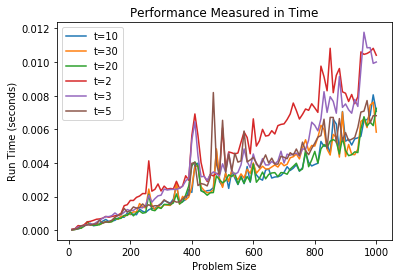

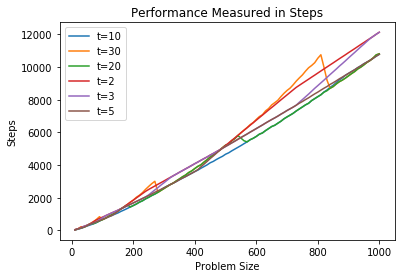

In [7]:
algorithms = {
    "t=2":lambda A, p, r: merge_sort_3way_aug(A, p, r, 2),
    "t=3":lambda A, p, r: merge_sort_3way_aug(A, p, r, 3),
    "t=5":lambda A, p, r: merge_sort_3way_aug(A, p, r, 5),
    "t=10":lambda A, p, r: merge_sort_3way_aug(A, p, r, 10),
    "t=20":lambda A, p, r: merge_sort_3way_aug(A, p, r, 20),
    "t=30":lambda A, p, r: merge_sort_3way_aug(A, p, r, 30)
}

t3, s3 = measure_performance(algorithms, trials=10, interval=10)

I tried t=2, 3, 5, 10, 20, 30 for thresholds in Augmented 3-way sort and plotted the results above. Some interesting observations:
1. The standard deviation for run time is realy high comparing to the steps. This is interesting because it indicates that something is unstable in my implementation of the algorithm (or my computer?).
2. The spikes in the second graph is really interesting, and it seems like there are some periodic scaling patterns. 
3. I suspect that the optimal threshold value is around 10.

In the next two cells, I'm going to:
1. explore the spike patterns.
2. try to decide the optimal threshold value.

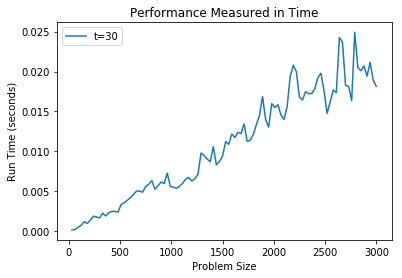

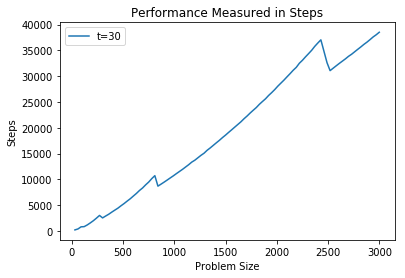

In [8]:
algorithms = {
    "t=30":lambda A, p, r: merge_sort_3way_aug(A, p, r, 30)
}

t3_1, s3_2 = measure_performance(algorithms, trials=20, interval=30, max_size=3000)

I plotted a single line (Augmented 3-way merge sort when threshold = 30) so it's easier to see. After checking the table of data, it seems like the peaks are at x=90, 270, 810, 2430. Each of them are about 3 times as large as the previous one. This makes sense because 3-way merge sort divides each list into 3 sublists. The plot shows when problem size is approaching 30\*3^i (i is any integer) from below, the number of steps will be relatively large because insertion sort will have to sort a list of roughly 30 numbers each time. When problem size is just above 30\*3^i, 3-way merge sort happens to divide lists into sublists that are much smaller than 30 at the lowest level, so insertion sort does less "work." Since we know that merge sort works faster than insertion sort, the less work insertion sort does, the faster the overall algorithm is.

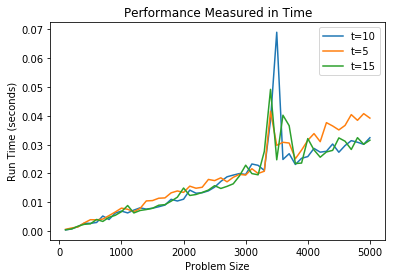

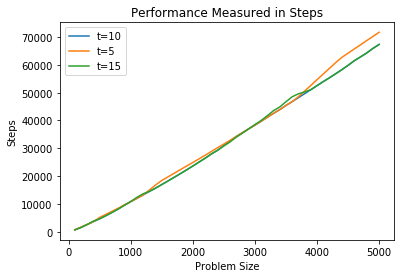

In [9]:
algorithms = {
    "t=5":lambda A, p, r: merge_sort_3way_aug(A, p, r, 5),
    "t=10":lambda A, p, r: merge_sort_3way_aug(A, p, r, 10),
    "t=15":lambda A, p, r: merge_sort_3way_aug(A, p, r, 15),
}

t3_2, s3_2 = measure_performance(algorithms, trials=2, max_size=5000, interval=100)

The plots above show that when the threshold is below 20, the spikes become less significant. It's difficult to choose the "optimal" parameter with certainty from these simple tests. Let's say it's around t=10.

## 2.4 The Final

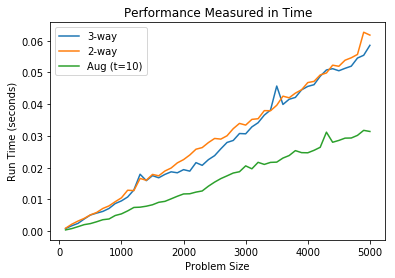

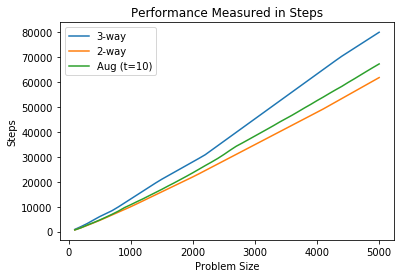

In [10]:
algorithms = {
    "Aug (t=10)":lambda A, p, r: merge_sort_3way_aug(A, p, r, 10),
    "3-way" : merge_sort_3way,
    "2-way" : merge_sort,
}
t4, s4 = measure_performance(algorithms, trials=10, max_size=5000, interval=100)

**(Within the scope of this assignment and constraints of number of trials and time for computation) I would like to annouce that:**
    
    The Steps Champion is 2-way, and

    The Time Champion is Aug(t=10)!!!!!




# 3. Appendix

In [16]:
def print_table(n, t, s):
    print "----------Test {}----------".format(str(n))
    print "###Time###"
    for _, __ in t.items():
        print _
        print __
    print "###Steps###"
    for _, __ in s.items():
        print _
        print __

print_table(1, t1, s1)
print_table(2, t2, s2)
print_table(3, t3, s3)
print_table(4, t4, s4)

----------Test 1----------
###Time###
Augmented 3-way
[0.0002832889556884766, 0.000584268569946289, 0.0009576320648193359, 0.000884389877319336, 0.0013390064239501953, 0.0017722129821777343, 0.0020997047424316405, 0.0021625041961669924, 0.0024945735931396484, 0.0034776926040649414, 0.003251385688781738, 0.0034940242767333984, 0.0037899017333984375, 0.004131197929382324, 0.0044650077819824215, 0.00499119758605957, 0.005338907241821289, 0.004855465888977051, 0.005420327186584473, 0.006511783599853516]
Regular
[0.0004905939102172851, 0.00099489688873291, 0.001739335060119629, 0.002196788787841797, 0.003019380569458008, 0.003717517852783203, 0.004532670974731446, 0.004166936874389649, 0.0050885677337646484, 0.007616591453552246, 0.008571672439575195, 0.007531380653381348, 0.008044099807739258, 0.009226298332214356, 0.008258223533630371, 0.009494590759277343, 0.010766100883483887, 0.01153111457824707, 0.01056985855102539, 0.012198877334594727]
3-way
[0.00044109821319580076, 0.00108900070190